In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#imorting libriraries 

import warnings 
warnings.filterwarnings("ignore") 

In [3]:
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [4]:
# to check how many data-points and features?
print(haberman.shape)

(306, 4)


Observations: there are total 305 data points with 3 features

In [5]:
# What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [6]:
#To check how many data points for "age" and other classes.
haberman["age"].value_counts()
haberman["surv_status"].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

In [7]:
haberman.describe() # to get overview of the data

age     op_year  axil_nodes  surv_status
count  306.000000  306.000000  306.000000   306.000000
mean    52.457516   62.852941    4.026144     1.264706
std     10.803452    3.249405    7.189654     0.441899
min     30.000000   58.000000    0.000000     1.000000
25%     44.000000   60.000000    0.000000     1.000000
50%     52.000000   63.000000    1.000000     1.000000
75%     60.750000   65.750000    4.000000     2.000000
max     83.000000   69.000000   52.000000     2.000000

Observations : Average age is 50 and minimum age is 30

[]

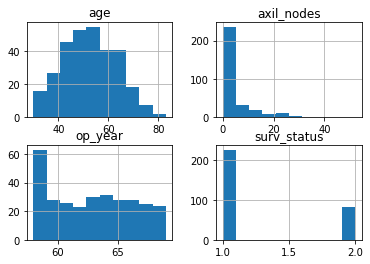

In [8]:
haberman.hist()
plt.plot()

from above plots we can observe
patients are in the age of 30 to 83 and most patients are in the age off 30 to 60.
Most of the patients have the cancer nodes in the range of 0 t0 10.
in the year 59 to 60 most of the patients get perated.
survival status shows that most of the patients have survived the operation.

In [9]:
haberman["alive/dead"] = np.where(haberman['surv_status']<=1, 'yes', 'no')
haberman


age  op_year  axil_nodes  surv_status alive/dead
0     30       64           1            1        yes
1     30       62           3            1        yes
2     30       65           0            1        yes
3     31       59           2            1        yes
4     31       65           4            1        yes
..   ...      ...         ...          ...        ...
301   75       62           1            1        yes
302   76       67           0            1        yes
303   77       65           3            1        yes
304   78       65           1            2         no
305   83       58           2            2         no

[306 rows x 5 columns]

Added one attribute to make the data easy and to make visulisation easy and understandable to each individuals.
Observation:
survival status shows that most of the patients have survived the operation.

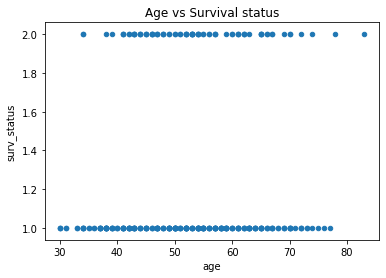

In [10]:
#2D scatter plots
haberman.plot(kind='scatter', x='age', y='surv_status') ;
plt.title('Age vs Survival status')
plt.show()

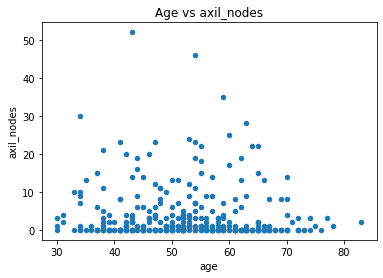

In [11]:
haberman.plot(kind='scatter', x='age', y='axil_nodes') ;
plt.title('Age vs axil_nodes')
plt.show()


#we canot conclude or identify anything from below plot

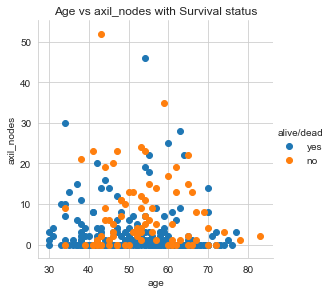

In [22]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="alive/dead", size=4) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.title('Age vs axil_nodes with Survival status')
plt.show();



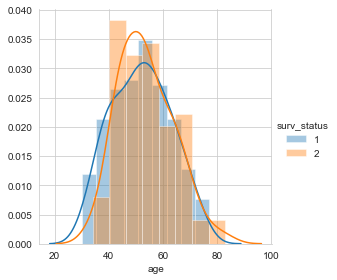

In [18]:
# distribution plots
sns.FacetGrid(haberman, hue ='surv_status', size= 4) \
    .map(sns.distplot, 'age')   \
    .add_legend();
plt.show()

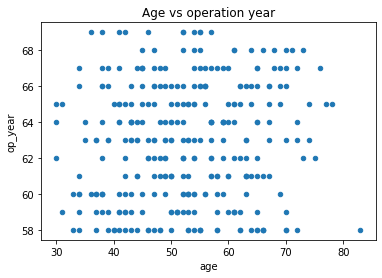

In [16]:
haberman.plot(kind='scatter', x='age', y='op_year') ;
plt.title('Age vs operation year')
plt.show()

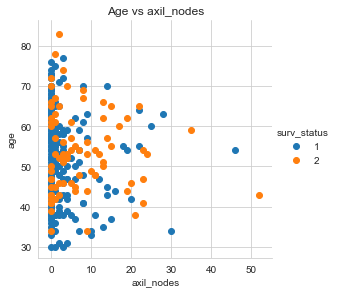

In [29]:
# 2-D Scatter plot with color-coding for survival status
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "axil_nodes", "age") \
   .add_legend();
plt.title('Age vs axil_nodes')
plt.show();

same plot
Observation:From the below plot blue and orange correspods to survivel status
We can see survivel status based on axil nodes and age. 
We can see paitent can survive or not. Blue means alive and orange means dead.
Like if a person having age of between 30 to 40 with 35 node , his survival status is 1(blue).
So the paitents between age of 30 to 40 can survive the operation.

#grid stlyes :

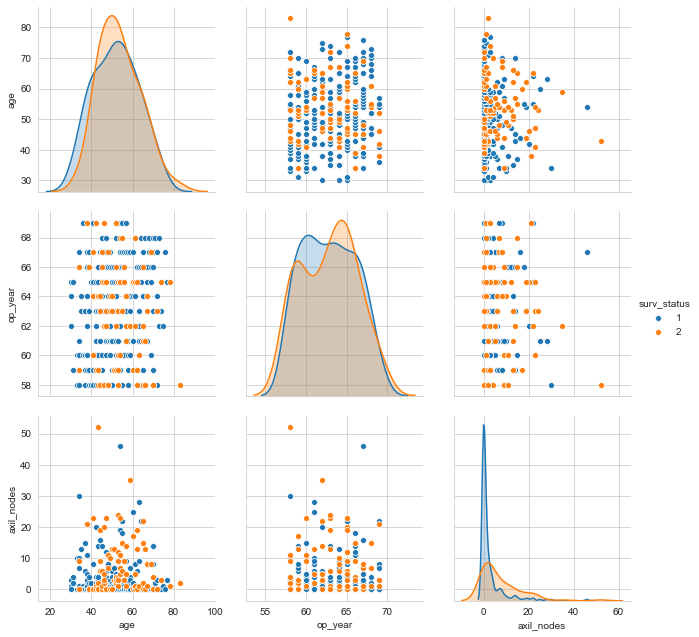

In [28]:
#pair plots
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_status", size=3,vars=["age","op_year","axil_nodes"]);
plt.show()

From above plots we are not getting good visulization or observation of the data.hense we will go for PDF,CDF and other plots

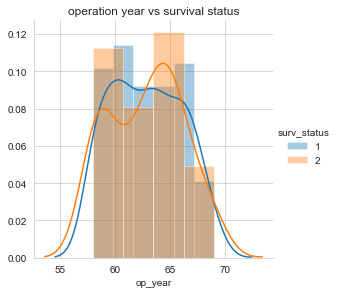

In [30]:
# distribution plots-2
sns.FacetGrid(haberman, hue ='surv_status', size= 4) \
    .map(sns.distplot, 'op_year')   \
    .add_legend();
plt.title('operation year vs survival status')
plt.show()

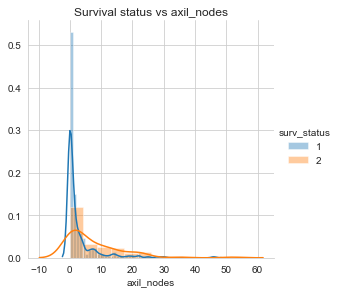

In [31]:
# distribution plots-3
sns.FacetGrid(haberman, hue ='surv_status', size= 4) \
    .map(sns.distplot, 'axil_nodes')   \
    .add_legend();
plt.title('Survival status vs axil_nodes')
plt.show()

Observation: We can see the Spread is more for survival status 1 than status 2
Most of the patients of status 1 has less no.of Axillary Nodes That may indicate a inverse relation
between Axillary nodes and Survival Status

PDF [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
PDF [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
CDF [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


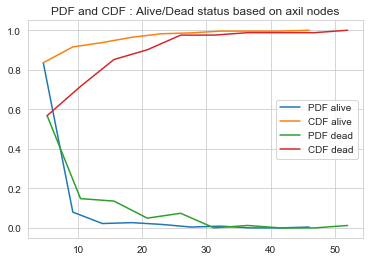

In [37]:
#Ploting PDF and CDF
# We added one attribute aliv/dead 

alive = haberman.loc[haberman["alive/dead"]=="yes"]
dead=haberman.loc[haberman["alive/dead"]=="no"]

counts, bin_edges = np.histogram(alive['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF alive');
plt.plot(bin_edges[1:], cdf,label='CDF alive');

counts, bin_edges = np.histogram(dead['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF dead');
plt.plot(bin_edges[1:], cdf,label='CDF dead');
plt.title('PDF and CDF : Alive/Dead status based on axil nodes')

plt.legend()    
plt.show();

#when the axil_nodes are between 10-30,the probability that a patient alive is lesser than dead. ie alive <dead when axil node is 10 to 30.
#if axil node is > 30 then alive and dead probability is same.
#if axil node is < 10 then alive ratio is more than dead.

PDF [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
PDF [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


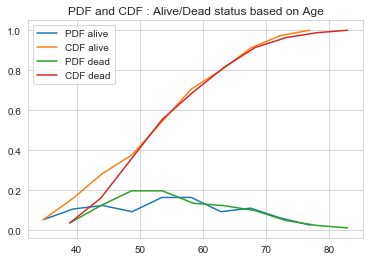

In [36]:
alive = haberman.loc[haberman["alive/dead"]=="yes"]
dead=haberman.loc[haberman["alive/dead"]=="no"]

counts, bin_edges = np.histogram(alive['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF alive');
plt.plot(bin_edges[1:], cdf,label='CDF alive');

counts, bin_edges = np.histogram(dead['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF dead');
plt.plot(bin_edges[1:], cdf,label='CDF dead');
plt.title('PDF and CDF : Alive/Dead status based on Age')

plt.legend()    
plt.show();

when age is less than 45 alive rate is more
when age is greater than 50 dead ratio is more than alive.

PDF [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
CDF [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
PDF [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
CDF [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


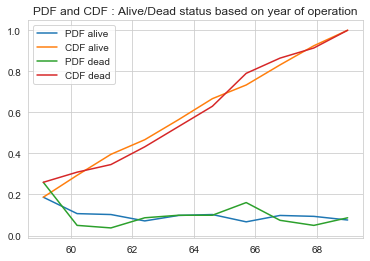

In [35]:
alive = haberman.loc[haberman["alive/dead"]=="yes"]
dead=haberman.loc[haberman["alive/dead"]=="no"]

counts, bin_edges = np.histogram(alive['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF alive');
plt.plot(bin_edges[1:], cdf,label='CDF alive');

counts, bin_edges = np.histogram(dead['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF",pdf);
cdf = np.cumsum(pdf)
print("CDF",cdf);
plt.plot(bin_edges[1:],pdf,label='PDF dead');
plt.plot(bin_edges[1:], cdf,label='CDF dead');
plt.title('PDF and CDF : Alive/Dead status based on year of operation')

plt.legend()    
plt.show();

the probality of patient is alive when operation year is 60-65
if oeration done before 60 then probabilty of patient dead is more.

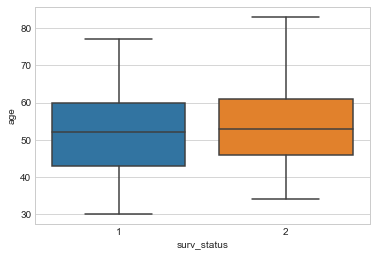

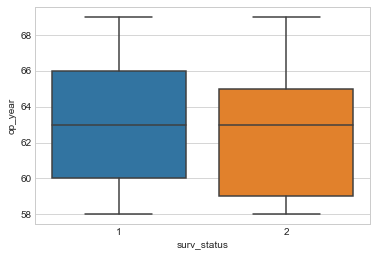

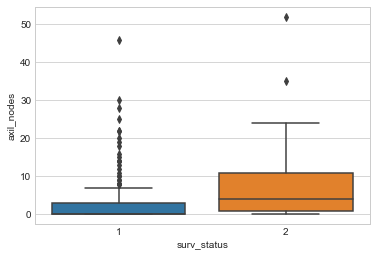

In [70]:
#Box plot for age,survival status,operation year and axil nodes
sns.boxplot(x='surv_status',y='age', data=haberman);
plt.show()
sns.boxplot(x='surv_status',y='op_year', data=haberman)
plt.show()
sns.boxplot(x='surv_status',y='axil_nodes', data=haberman)
plt.show()

Observation:
Status1 shows 50 percentile people has Axillary nodes 0 and 75 percentile 

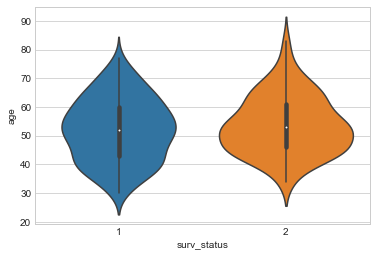

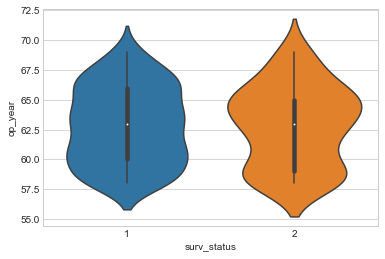

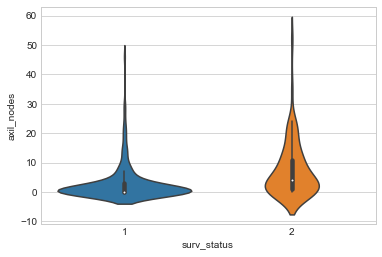

In [71]:
#Violin plot for age,survival status,operation year and axil nodes
sns.violinplot(x='surv_status',y='age', data=haberman);
plt.show()
sns.violinplot(x='surv_status',y='op_year', data=haberman)
plt.show()
sns.violinplot(x='surv_status',y='axil_nodes', data=haberman)
plt.show()

In [73]:
#Mean, Variance and Std-dev
haberman.describe()

age     op_year  axil_nodes  surv_status
count  306.000000  306.000000  306.000000   306.000000
mean    52.457516   62.852941    4.026144     1.264706
std     10.803452    3.249405    7.189654     0.441899
min     30.000000   58.000000    0.000000     1.000000
25%     44.000000   60.000000    0.000000     1.000000
50%     52.000000   63.000000    1.000000     1.000000
75%     60.750000   65.750000    4.000000     2.000000
max     83.000000   69.000000   52.000000     2.000000

From PDF,Box plot and Means of no.of axillary nodes, It is evident that if there
are more no.of axillary nodes the patient may tend to die with in 5 years of operation.